***Постановка задачи:***

Датасет содержит информацию о клиентах некоторого банка.
Ваша задача состоит в том, чтобы по различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку 90 и более дней или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет).


**Целевая переменная**
- `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

**Признаки**
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings

#Importing the data
df_credit = pd.read_csv("https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/credit_scoring.csv")
#df = pd.read_csv("/content/drive/MyDrive/credit_scoring.csv") #local dataframe

In [ ]:
df_credit.shape

(150000, 12)

# First look on data

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [ ]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


In [ ]:
df_credit.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
RealEstateLoansOrLines                       5
GroupAge                                     5
dtype: int64

In [ ]:
print('RELoL:\n', df_credit['RealEstateLoansOrLines'].unique())

RELoL:
 ['A' 'B' 'C' 'E' 'D']


In [ ]:
print('GroupAge:\n', df_credit['GroupAge'].unique())

GroupAge:
 ['c' 'b' 'd' 'e' 'a']


# Age

In [ ]:
print('Min age: ', df_credit['age'].max())
print('Max age: ', df_credit['age'].min())
print('Null Values: ', df_credit['age'].isnull().any())

Min age:  109.0
Max age:  0.0
Null Values:  True


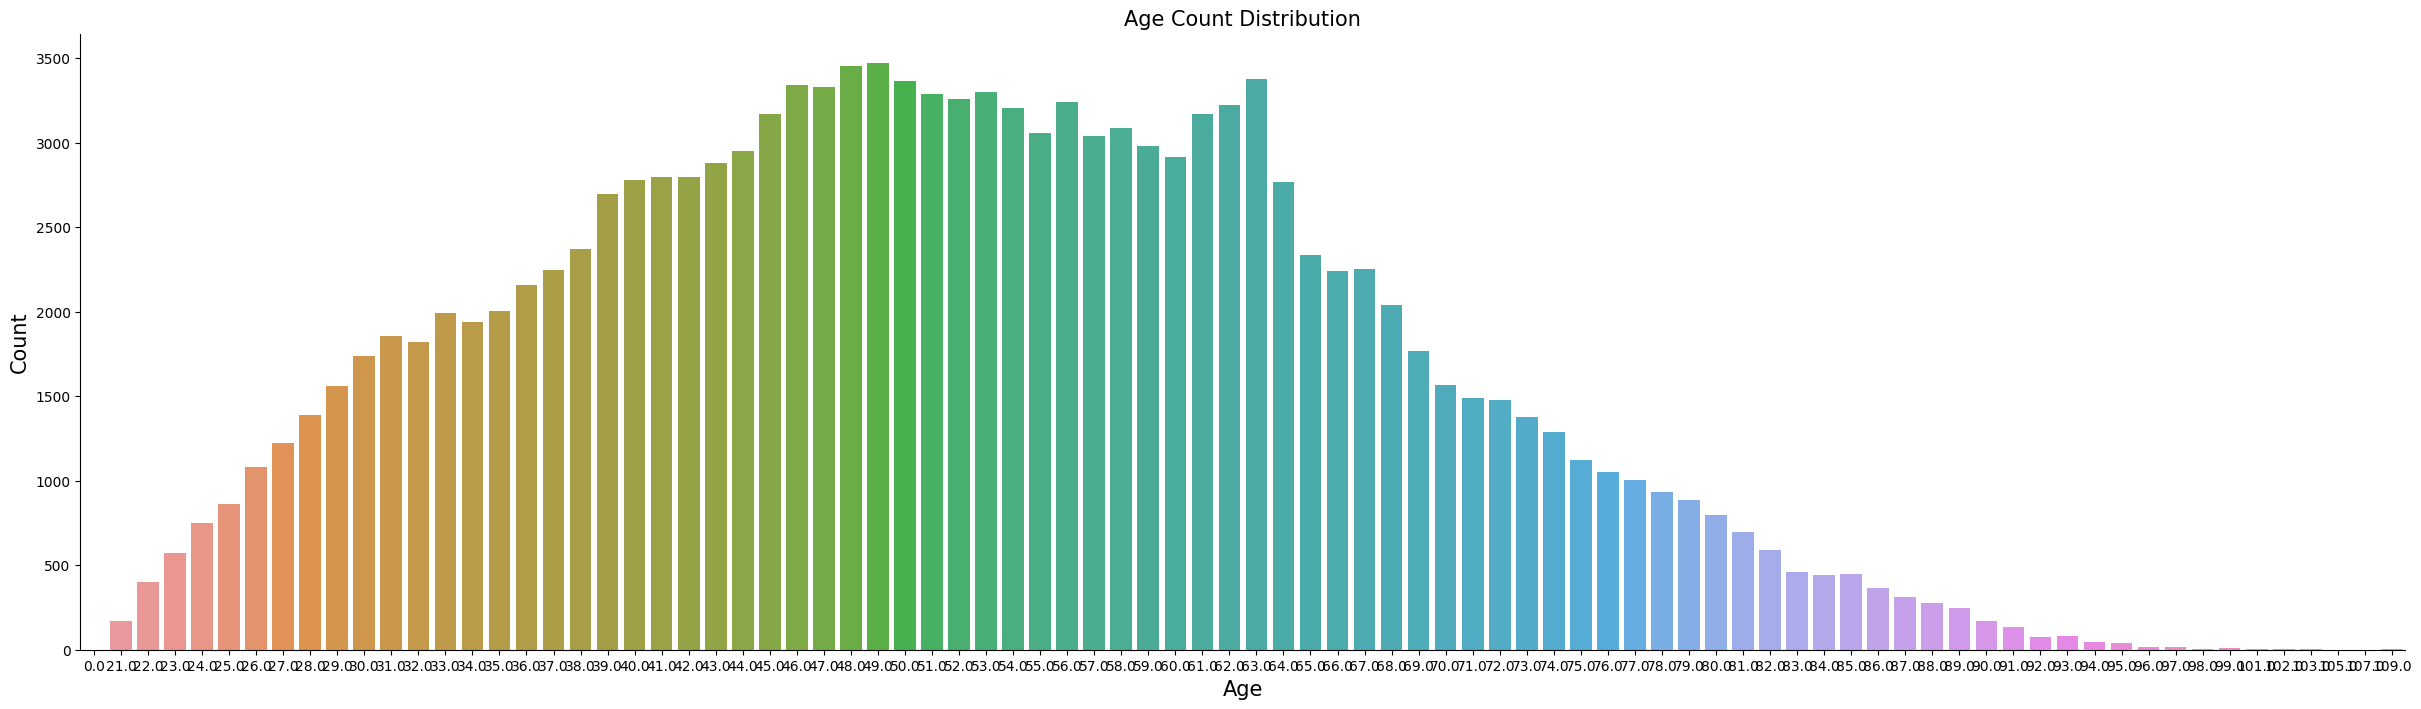

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'age', data = df_credit)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

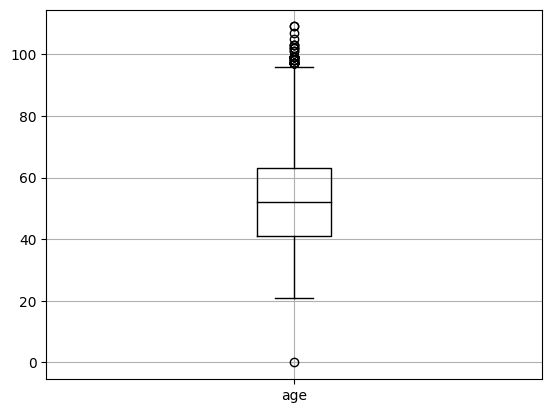

In [ ]:
df_credit.boxplot(column=['age'], grid= False , color='black')
plt.grid()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

<ipython-input-143-3aa65570c44c>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




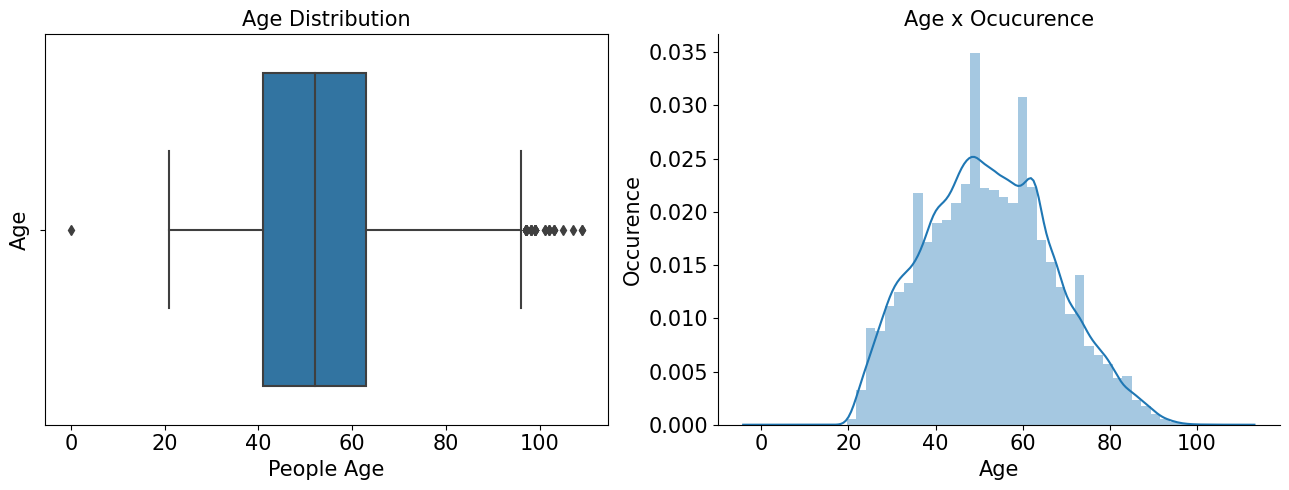

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df_credit, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_credit['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', df_credit['age'].quantile(q = 0.25))
print('2º Quartile: ', df_credit['age'].quantile(q = 0.50))
print('3º Quartile: ', df_credit['age'].quantile(q = 0.75))
print('4º Quartile: ', df_credit['age'].quantile(q = 1.00))

print('Возраст выше: ', df_credit['age'].quantile(q = 0.75) +
                      1.5*(df_credit['age'].quantile(q = 0.75) - df_credit['age'].quantile(q = 0.25)), ' -  выброс')

1º Quartile:  41.0
2º Quartile:  52.0
3º Quartile:  63.0
4º Quartile:  109.0
Возраст выше:  96.0  -  выброс


In [ ]:
df_credit["age"].describe()

count    135155.000000
mean         52.293618
std          14.772577
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [ ]:
print('Numerber of outliers: ', df_credit[df_credit['age'] > 96.0]['age'].count())
print('Number of clients: ', len(df_credit))
#Outliers in %
print('Outliers are:', round(df_credit[df_credit['age'] > 96.0]['age'].count()*100/len(df_credit),2), '%')

Numerber of outliers:  43
Number of clients:  150000
Outliers are: 0.03 %


In [ ]:
print('Numerber of outliers: ', df_credit[df_credit['age'] < 17]['age'].count())
print('Number of clients: ', len(df_credit))
#Outliers in %
print('Outliers are:', round(df_credit[df_credit['age'] < 17]['age'].count()*100/len(df_credit),2), '%')

Numerber of outliers:  1
Number of clients:  150000
Outliers are: 0.0 %




---
Выбросим экстримальные значения в данных


---




In [ ]:
df_credit['MonthlyIncome'] = df_credit['MonthlyIncome'].fillna(0.0)
df_credit['NumberOfDependents'] = df_credit['NumberOfDependents'].fillna(0.0)
df_credit['age'] = df_credit['age'].fillna(df_credit['age'].mean())

In [ ]:
upper_array = np.where(df_credit['age']>=96.0)[0]
df_credit.drop(axis=0,index=upper_array, inplace=True)

In [ ]:
upper_array_zero = np.where(df_credit['age'] == 0.0)[0]
print(upper_array_zero)
df_credit.drop(axis=0,index=41636, inplace=True)

[41636]


In [ ]:
df_credit["age"].describe()

count    149938.000000
mean         52.273975
std          13.995584
min           0.000000
25%          43.000000
50%          52.273916
75%          61.000000
max          95.000000
Name: age, dtype: float64

# Monthly Income

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

<ipython-input-189-906f2e42b647>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




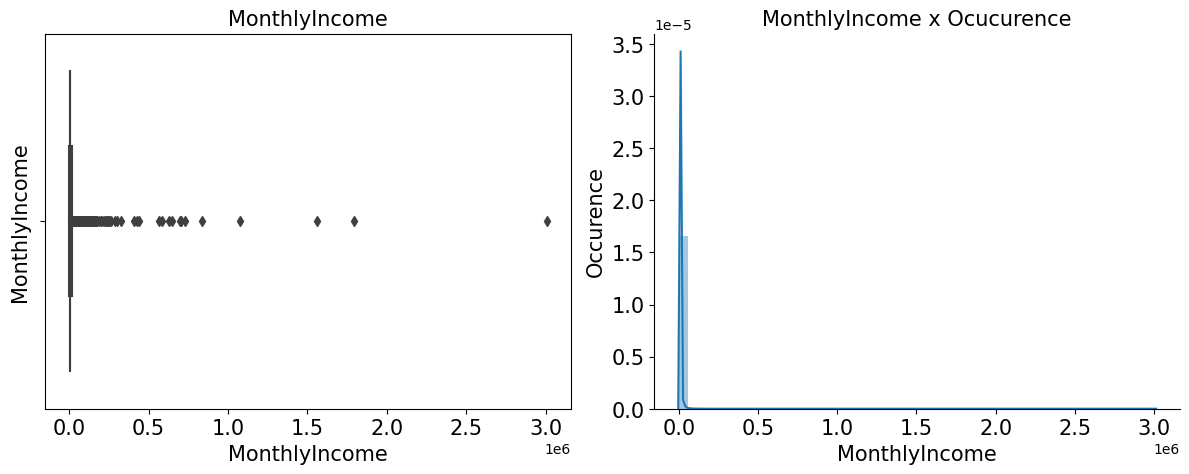

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(x = 'MonthlyIncome', data = df_credit, orient = 'v', ax = ax1)
ax1.set_xlabel('MonthlyIncome', fontsize=15)
ax1.set_ylabel('MonthlyIncome', fontsize=15)
ax1.set_title('MonthlyIncome', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_credit['MonthlyIncome'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('MonthlyIncome', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('MonthlyIncome x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
df_credit["MonthlyIncome"].describe()

count    1.202420e+05
mean     6.670826e+03
std      1.438618e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [ ]:
# Quartiles
print('1º Quartile: ', df_credit['MonthlyIncome'].quantile(q = 0.25))
print('2º Quartile: ', df_credit['MonthlyIncome'].quantile(q = 0.50))
print('3º Quartile: ', df_credit['MonthlyIncome'].quantile(q = 0.75))
print('4º Quartile: ', df_credit['MonthlyIncome'].quantile(q = 1.00))

print('MonthlyIncomes выше: ', df_credit['MonthlyIncome'].quantile(q = 0.75) +
                      1.5*(df_credit['MonthlyIncome'].quantile(q = 0.75) - df_credit['MonthlyIncome'].quantile(q = 0.25)), '- выброс')

1º Quartile:  3400.0
2º Quartile:  5400.0
3º Quartile:  8249.0
4º Quartile:  3008750.0
MonthlyIncomes выше:  15522.5 - выброс


In [ ]:
print('Numerber of outliers: ', df_credit[df_credit['MonthlyIncome'] > 15522.5]['MonthlyIncome'].count())
print('Number of clients: ', len(df_credit))
#Outliers in %
print('Outliers are:', round(df_credit[df_credit['MonthlyIncome'] > 15522.5]['MonthlyIncome'].count()*100/len(df_credit),2), '%')

Numerber of outliers:  4879
Number of clients:  149941
Outliers are: 3.25 %


In [ ]:
print('Numerber of outliers: ', df_credit[df_credit['MonthlyIncome'] == 0]['MonthlyIncome'].count())
print('Number of clients: ', len(df_credit))
#Outliers in %
print('Outliers are:', round(df_credit[df_credit['MonthlyIncome'] == 0]['MonthlyIncome'].count()*100/len(df_credit),2), '%')

Numerber of outliers:  1633
Number of clients:  149941
Outliers are: 1.09 %




---

Выбросим экстримальные значения


---



In [ ]:
upper_array_income = np.where(df_credit['MonthlyIncome']>=15522.5)[0]
print(upper_array_income)
print(len(df_credit['MonthlyIncome']))
df_credit.drop(index=upper_array_income, inplace=True)

[    16     28     34 ... 149884 149916 149932]
149938


KeyError: ignored

# Other features

In [ ]:
df_credit['NumberOfDependents'] = df_credit['NumberOfDependents'].fillna(0.0)

# Target + correlation




---


Распределение целевой переменной - ДИЗБАЛАНСА КЛАССОВ


---



0    0.933154
1    0.066846
Name: SeriousDlqin2yrs, dtype: float64

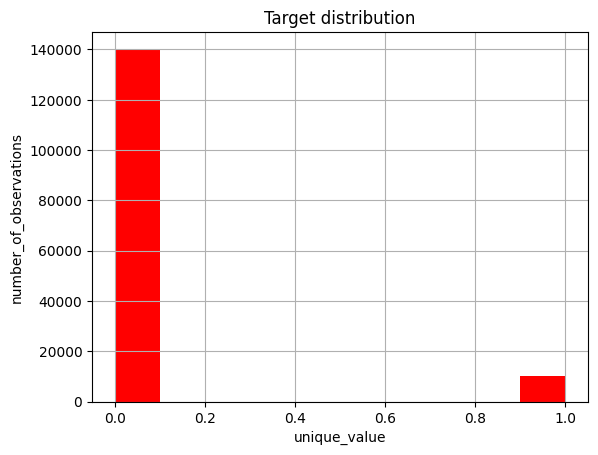

In [ ]:
ax = df_credit['SeriousDlqin2yrs'].hist(color='red')
ax.set_ylabel("number_of_observations")
ax.set_xlabel("unique_value")
ax.set_title("Target distribution")

df_credit['SeriousDlqin2yrs'].value_counts()/df_credit.shape[0]

<ipython-input-209-e61a48459951>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

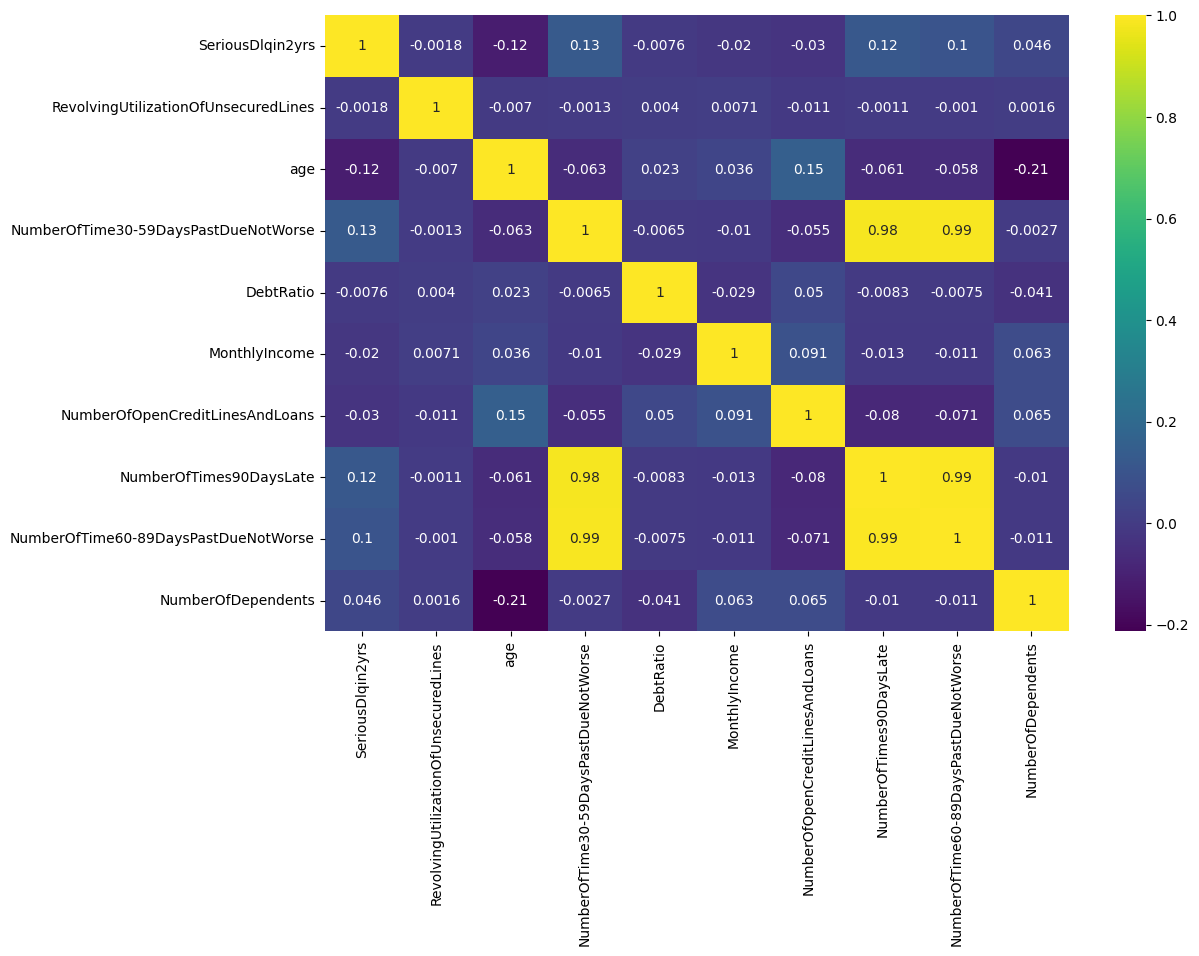

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_credit.corr(), annot=True, cmap='viridis')

In [ ]:
independent_columns_names = [x for x in df_credit if x != 'SeriousDlqin2yrs']
independent_columns_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'RealEstateLoansOrLines',
 'GroupAge']

# Model

In [ ]:
X = df_credit.drop(['SeriousDlqin2yrs'], axis=1)

y = df_credit['SeriousDlqin2yrs']

In [ ]:
X.shape

(149941, 11)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149941 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149941 non-null  float64
 1   age                                   135096 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  149941 non-null  int64  
 3   DebtRatio                             149941 non-null  float64
 4   MonthlyIncome                         120242 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       149941 non-null  int64  
 6   NumberOfTimes90DaysLate               149941 non-null  int64  
 7   NumberOfTime60-89DaysPastDueNotWorse  149941 non-null  int64  
 8   NumberOfDependents                    146033 non-null  float64
 9   RealEstateLoansOrLines                149941 non-null  object 
 10  GroupAge                              149941 non-null  object 
dtype

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1942313295, random_state=42)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
RealEstateLoansOrLines                   object
GroupAge                                 object
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

categorical = ['RealEstateLoansOrLines', 'GroupAge']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [ ]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train = pd.DataFrame(X_train_transformed, columns=lst)
X_test = pd.DataFrame(X_test_transformed, columns=lst)

X_train.head()

,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E,GroupAge_b,GroupAge_c,GroupAge_d,GroupAge_e,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.508115e-07,0.505263,0.000000,7.518332e-07,0.005726,0.224138,0.0,0.0,0.4
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.706270e-06,0.494737,0.000000,9.184279e-07,0.002853,0.189655,0.0,0.0,0.1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.354687e-06,0.515789,0.000000,1.491432e-06,0.002973,0.103448,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.879941e-05,0.357895,0.010204,1.766390e-06,0.001496,0.206897,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000e+00,0.778947,0.000000,0.000000e+00,0.000779,0.086207,0.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149941 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149941 non-null  float64
 1   age                                   135096 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  149941 non-null  int64  
 3   DebtRatio                             149941 non-null  float64
 4   MonthlyIncome                         120242 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       149941 non-null  int64  
 6   NumberOfTimes90DaysLate               149941 non-null  int64  
 7   NumberOfTime60-89DaysPastDueNotWorse  149941 non-null  int64  
 8   NumberOfDependents                    146033 non-null  float64
 9   RealEstateLoansOrLines                149941 non-null  object 
 10  GroupAge                              149941 non-null  object 
dtype

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

ValueError: ignored